<a href="https://colab.research.google.com/github/Annie-blare/WSL_LAB/blob/main/Copy_of_TotalOilSeeds_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def individual_analysis(file_path, district_name, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Selecting the specified variables
    X = data[[variable1]]
    y = data[variable2]

    # Performing linear regression
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # Extracting variable1 for the specified district
    district_variable1 = data.loc[data['District'] == district_name, variable1].iloc[0]

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Calculating variable2(old) for the specified district
    variable2_old = data.loc[data['District'] == district_name, variable2].iloc[0]

    # Min-max normalization for variable2(old)
    variable2_min = y.min()
    variable2_max = y.max()
    normalized_variable2_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

    # Applying corrected perturbations and calculating new values
    results_corrected = []
    for p in perturbations_corrected:
        perturbed_variable1 = district_variable1 * (1 + p)
        variable2_new = m * perturbed_variable1 + c
        normalized_variable2_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
        change_in_variable2 = variable2_new - variable2_old
        impact = normalized_variable2_new - normalized_variable2_old

        results_corrected.append({
            'Perturbation': f'P{user_perturbations.index(p*100)+1}',
            'Magnitude (%)': p*100,
            f'{variable2}_old': variable2_old,
            f'Normalized_{variable2}_old': normalized_variable2_old,
            f'{variable2}_new': variable2_new,
            f'Normalized_{variable2}_new': normalized_variable2_new,
            f'Change_in_{variable2}': change_in_variable2,
            'Impact': impact
        })

    results_df_corrected = pd.DataFrame(results_corrected)
    print(results_df_corrected)

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
district_name = 'BENGALURU'
variable1 = 'TotalNPK'
variable2 = 'TotalOilSeeds_Production'
user_perturbations = [10, -10, -20, 20]
individual_analysis(file_path, district_name, variable1, variable2, user_perturbations)


  Perturbation  Magnitude (%)  TotalOilSeeds_Production_old  \
0           P1           10.0                           162   
1           P2          -10.0                           162   
2           P3          -20.0                           162   
3           P4           20.0                           162   

   Normalized_TotalOilSeeds_Production_old  TotalOilSeeds_Production_new  \
0                                 0.001003                  18073.015404   
1                                 0.001003                  16123.334811   
2                                 0.001003                  15148.494514   
3                                 0.001003                  19047.855701   

   Normalized_TotalOilSeeds_Production_new  \
0                                 0.154625   
1                                 0.137903   
2                                 0.129541   
3                                 0.162986   

   Change_in_TotalOilSeeds_Production    Impact  
0                     

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def district_analysis(file_path, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    X = data[[variable1]]
    y = data[variable2]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for variable2
    variable2_min = y.min()
    variable2_max = y.max()

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_variable1 = data.loc[data['District'] == district, variable1].iloc[0]
        variable2_old = data.loc[data['District'] == district, variable2].iloc[0]
        normalized_variable2_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

        district_results = []

        # Applying perturbations and calculating new values for each perturbation
        for p in perturbations_corrected:
            perturbed_variable1 = district_variable1 * (1 + p)
            variable2_new = m * perturbed_variable1 + c
            normalized_variable2_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
            change_in_variable2 = variable2_new - variable2_old
            impact = normalized_variable2_new - normalized_variable2_old

            district_results.append({
                'Perturbation (%)': p * 100,
                f'{variable2}_old': variable2_old,
                f'Normalized_{variable2}_old': normalized_variable2_old,
                f'{variable2}_new': variable2_new,
                f'Normalized_{variable2}_new': normalized_variable2_new,
                f'Change_in_{variable2}': change_in_variable2,
                'Impact': impact
            })

        # Convert the district results into a DataFrame and print it
        district_df = pd.DataFrame(district_results)
        print(f"Results for {district}:")
        print(district_df)
        print("\n")  # Add a newline for better readability between districts

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
variable1 = 'TotalNPK'
variable2 = 'TotalOilSeeds_Production'
user_perturbations = [10, -10, -20, 20]
district_analysis(file_path, variable1, variable2, user_perturbations)


Results for BENGALURU:
   Perturbation (%)  TotalOilSeeds_Production_old  \
0              10.0                           162   
1             -10.0                           162   
2             -20.0                           162   
3              20.0                           162   

   Normalized_TotalOilSeeds_Production_old  TotalOilSeeds_Production_new  \
0                                 0.001003                  18073.015404   
1                                 0.001003                  16123.334811   
2                                 0.001003                  15148.494514   
3                                 0.001003                  19047.855701   

   Normalized_TotalOilSeeds_Production_new  \
0                                 0.154625   
1                                 0.137903   
2                                 0.129541   
3                                 0.162986   

   Change_in_TotalOilSeeds_Production    Impact  
0                        17911.015404  0.153621  

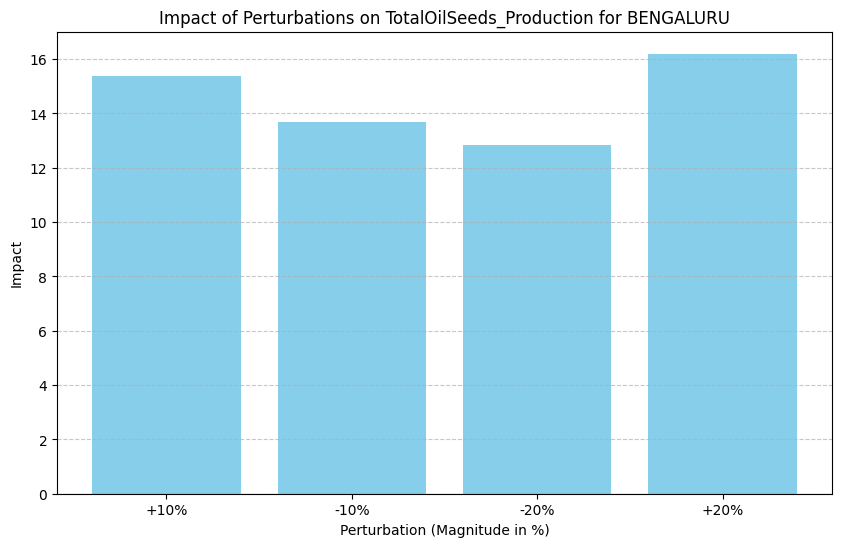

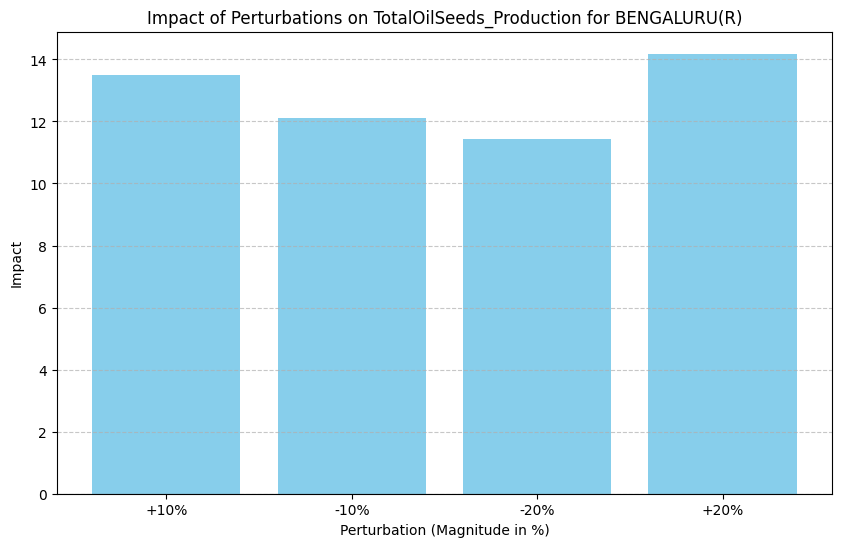

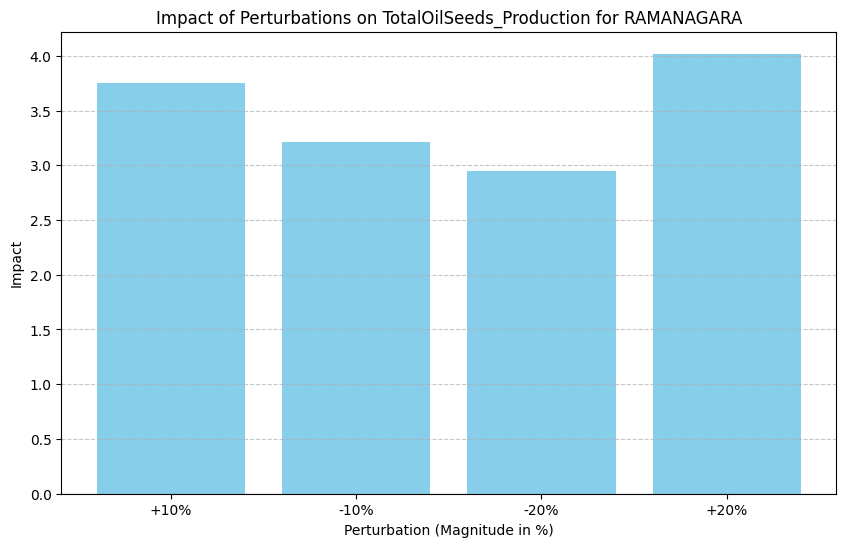

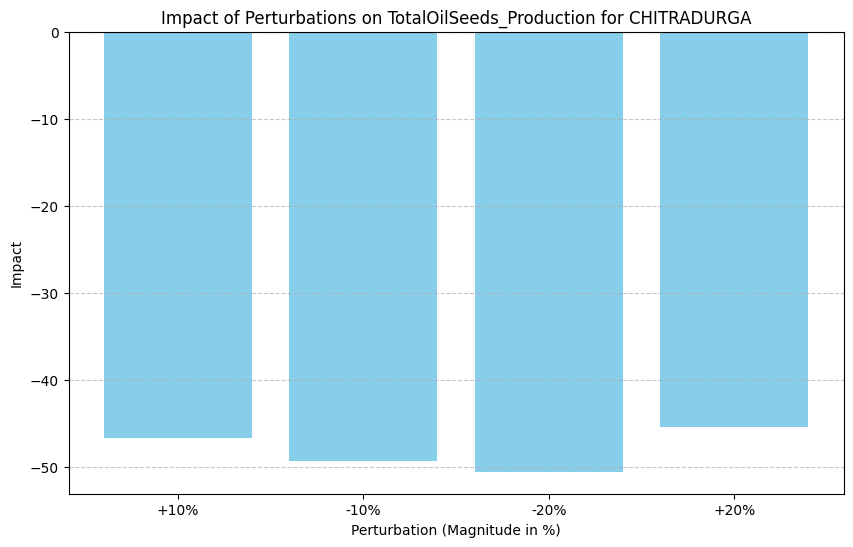

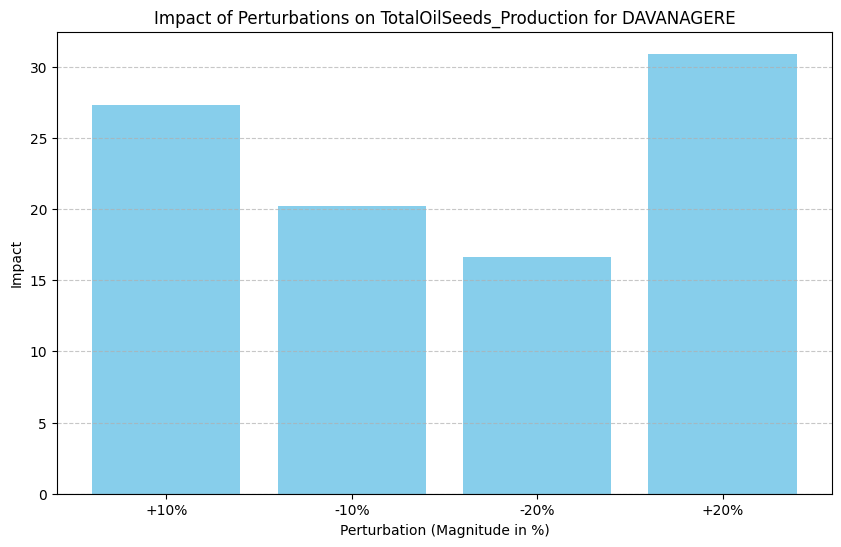

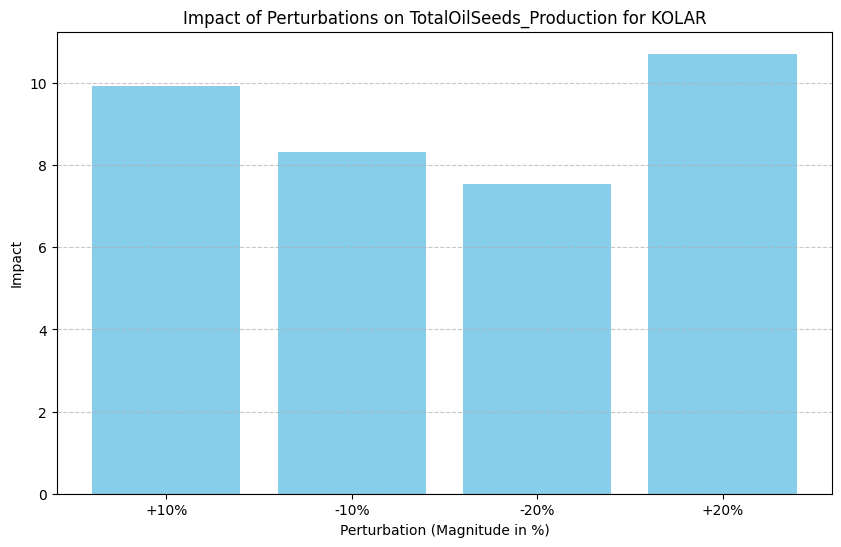

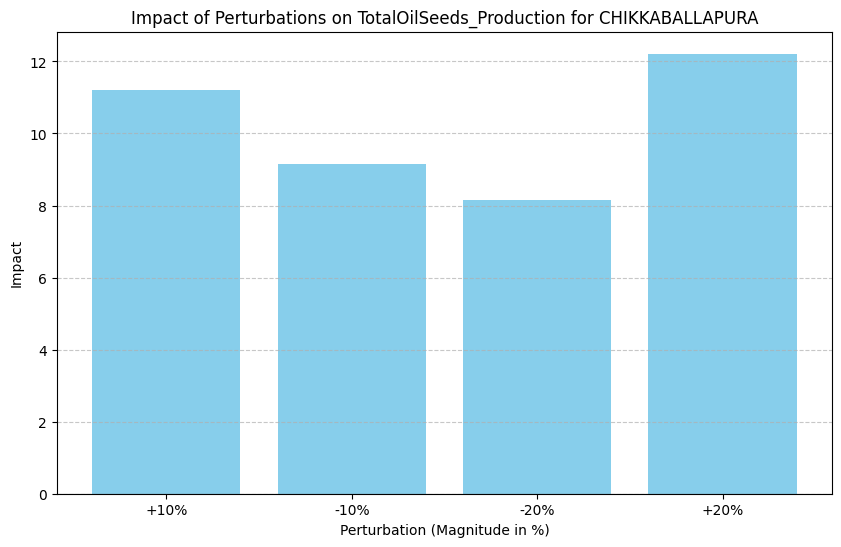

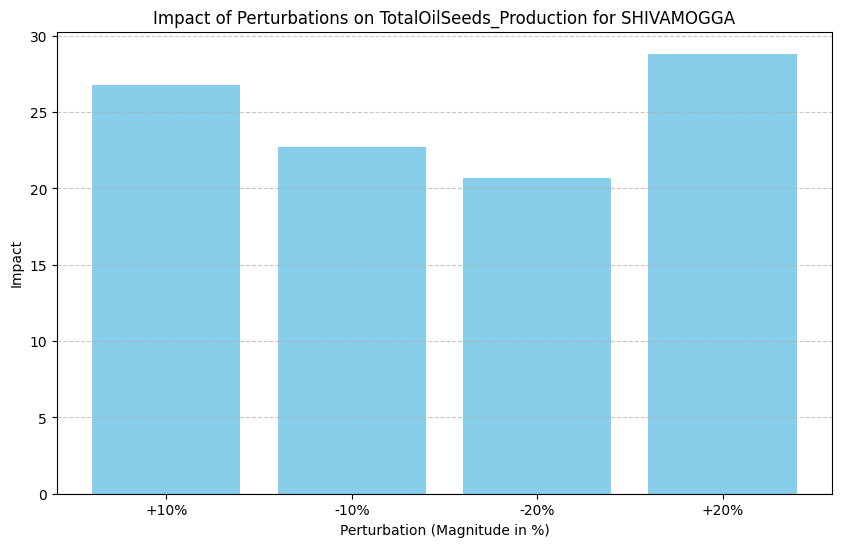

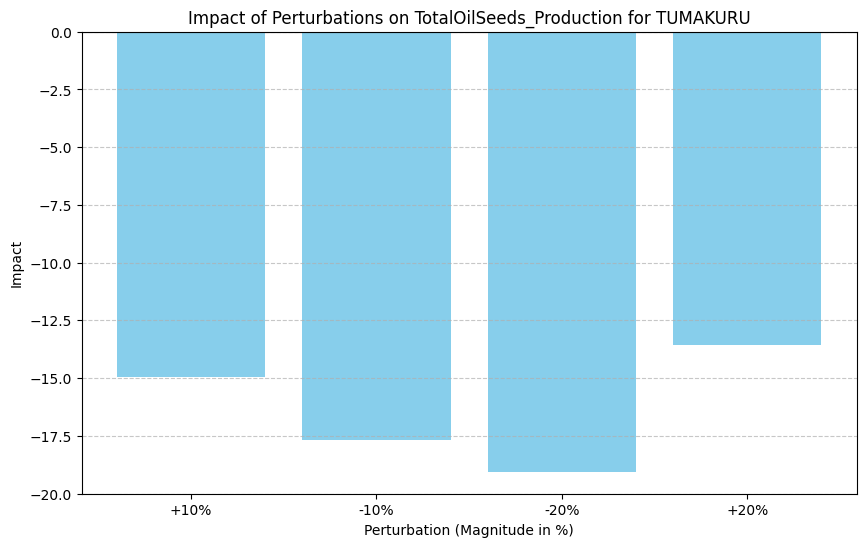

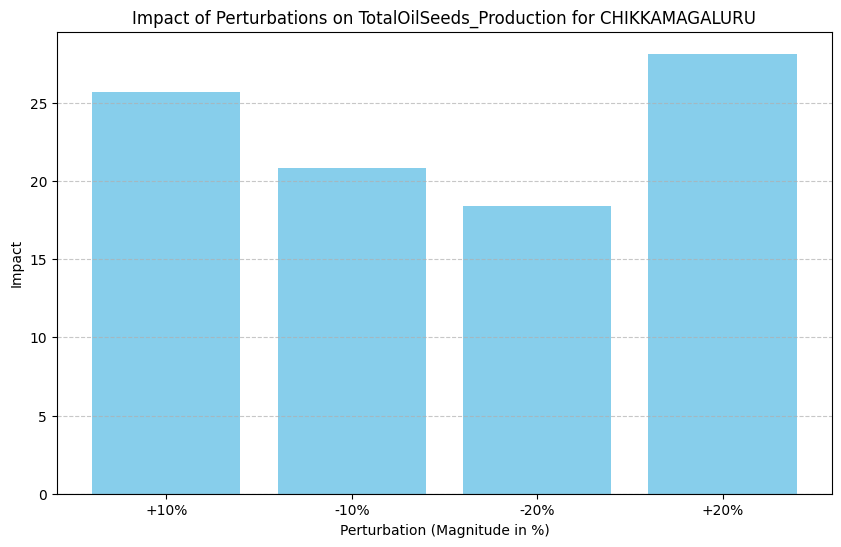

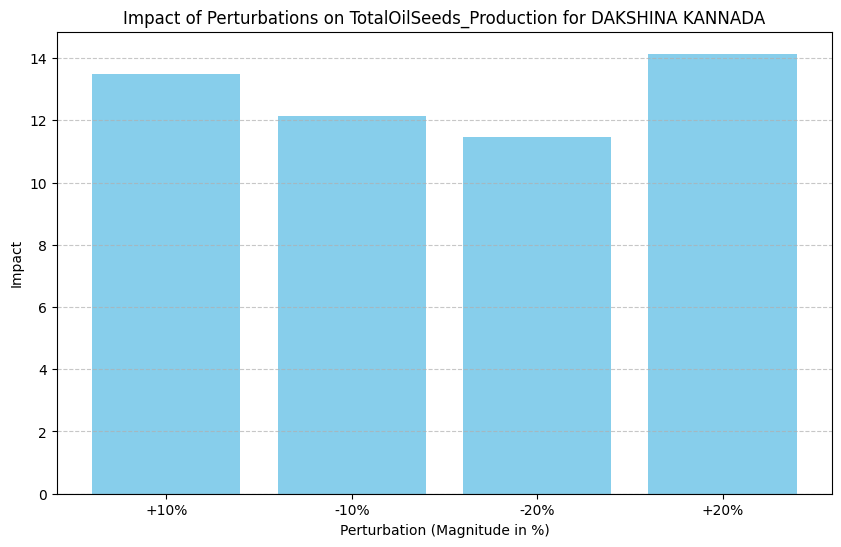

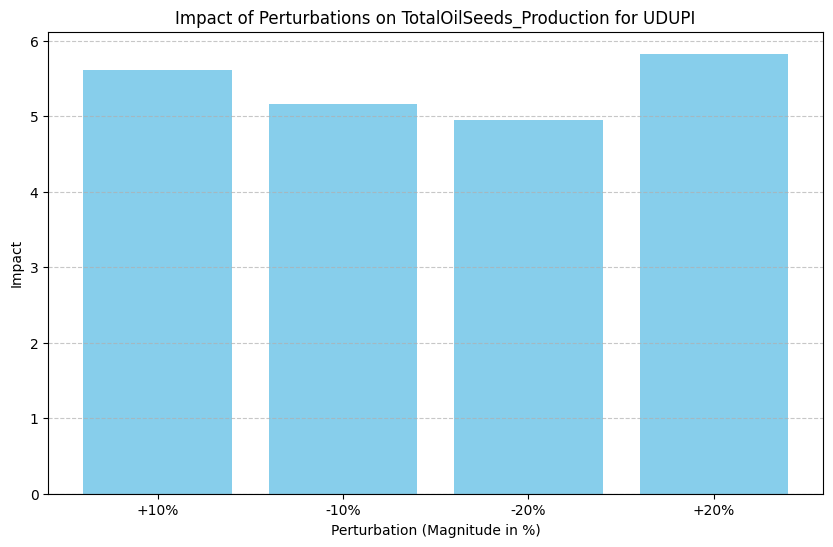

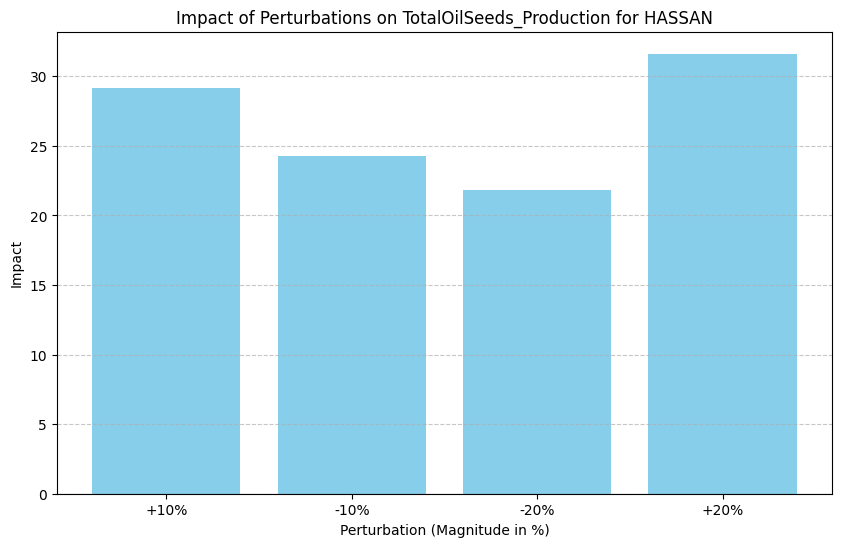

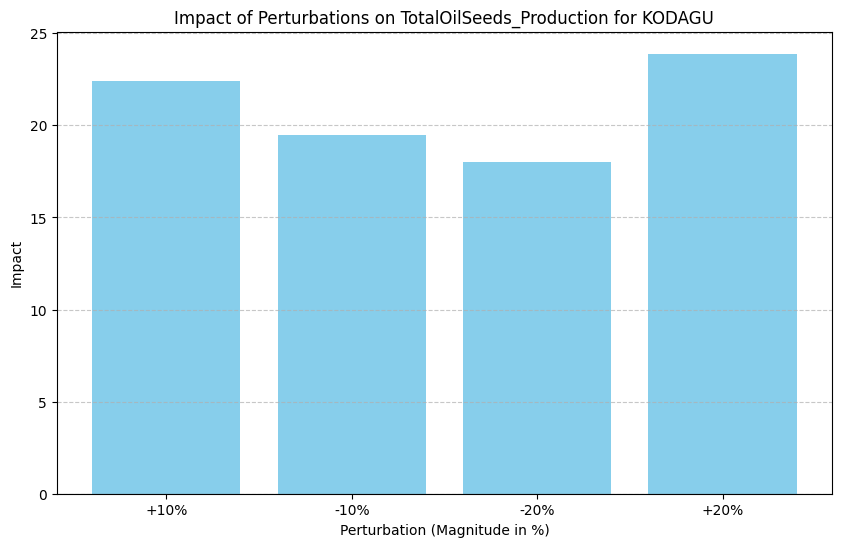

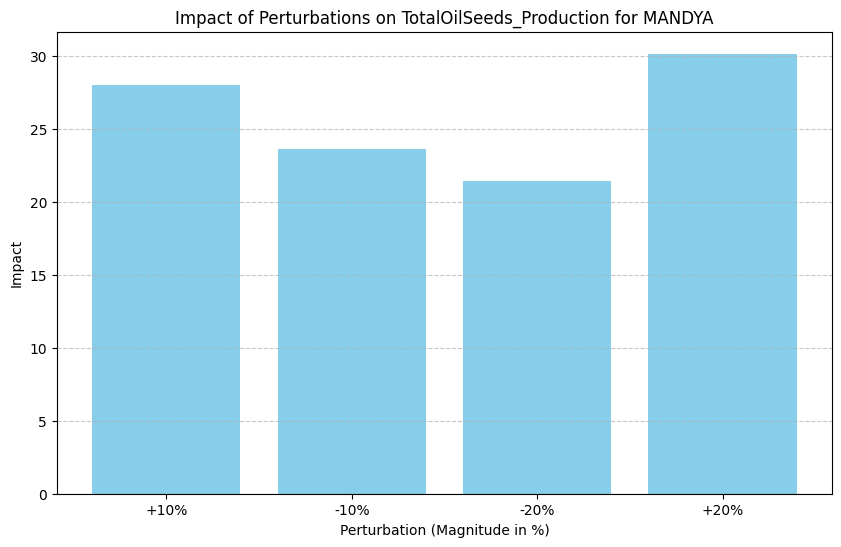

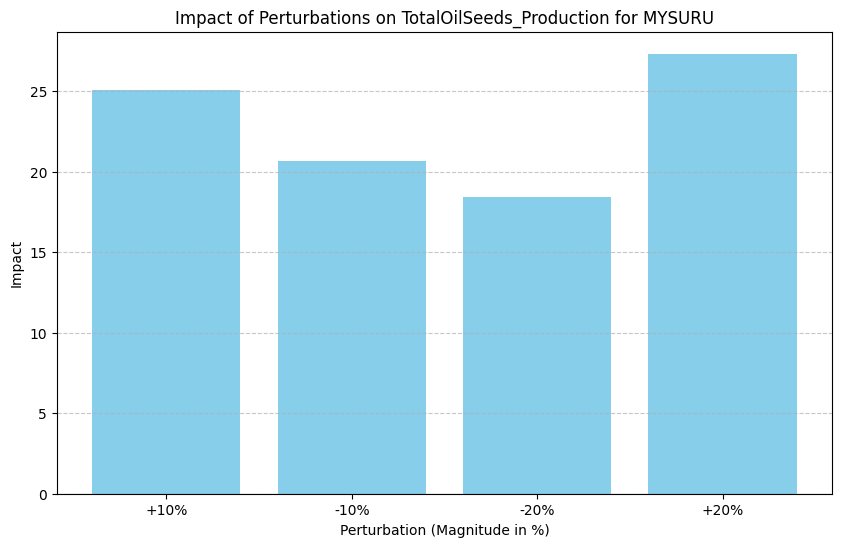

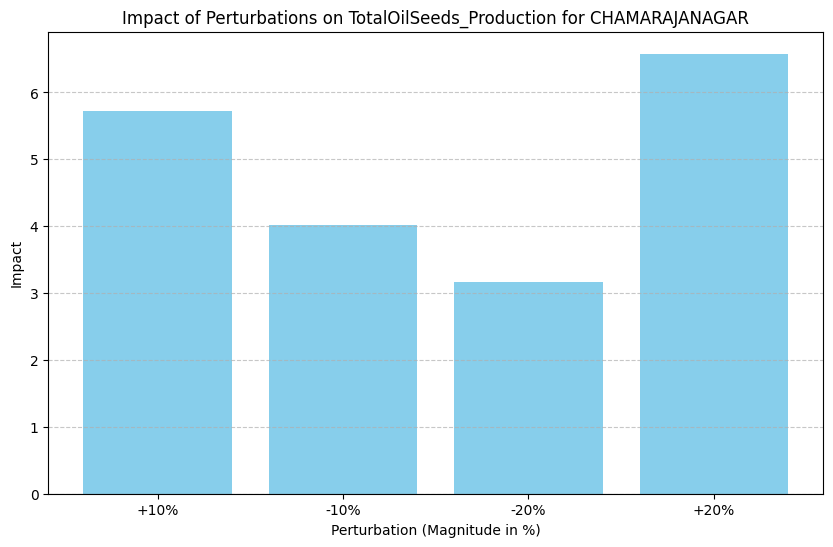

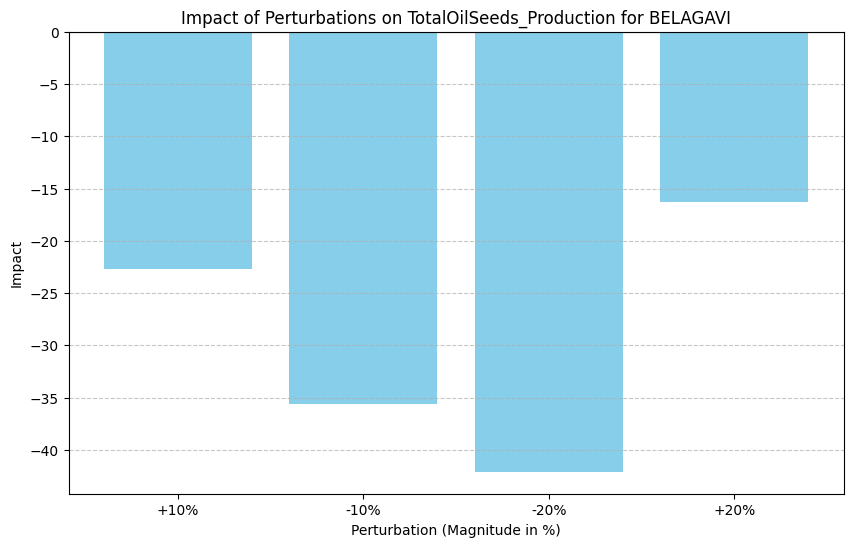

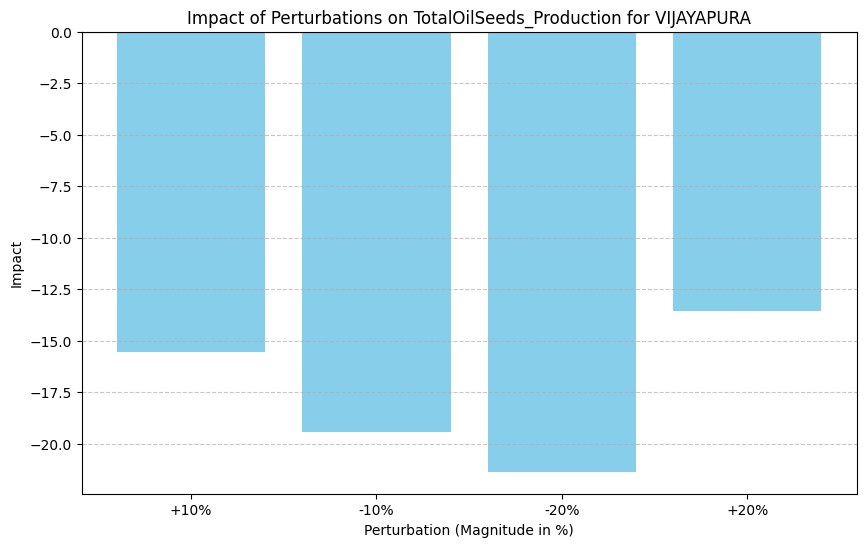

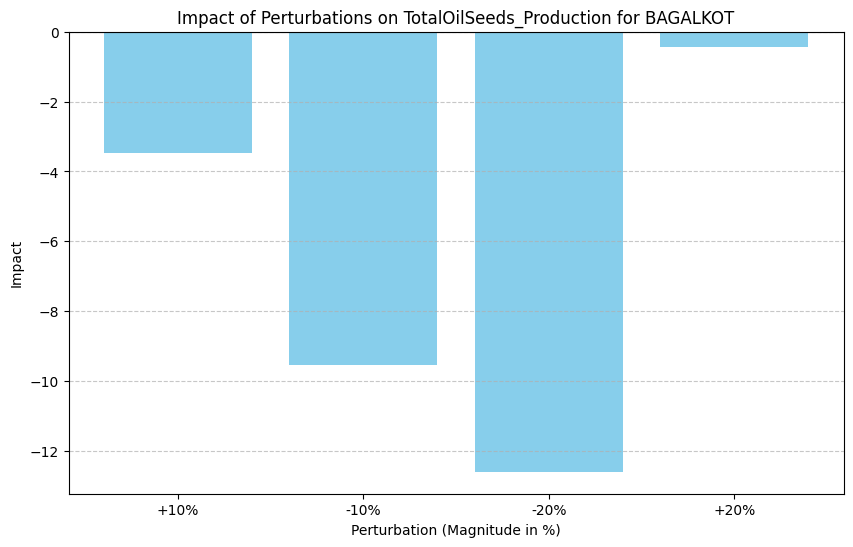

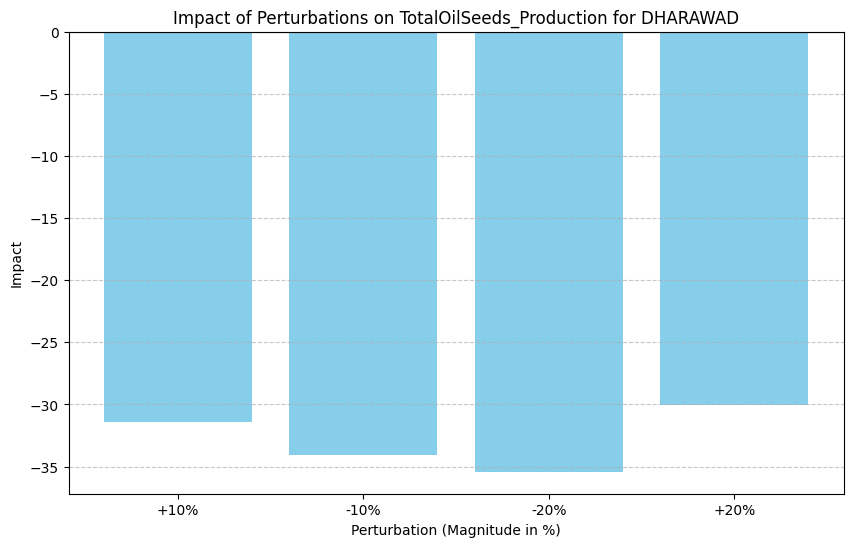

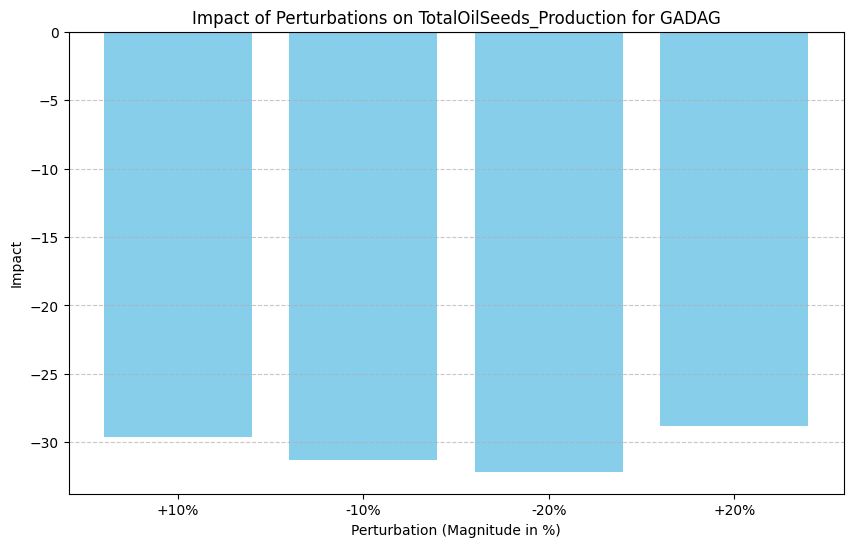

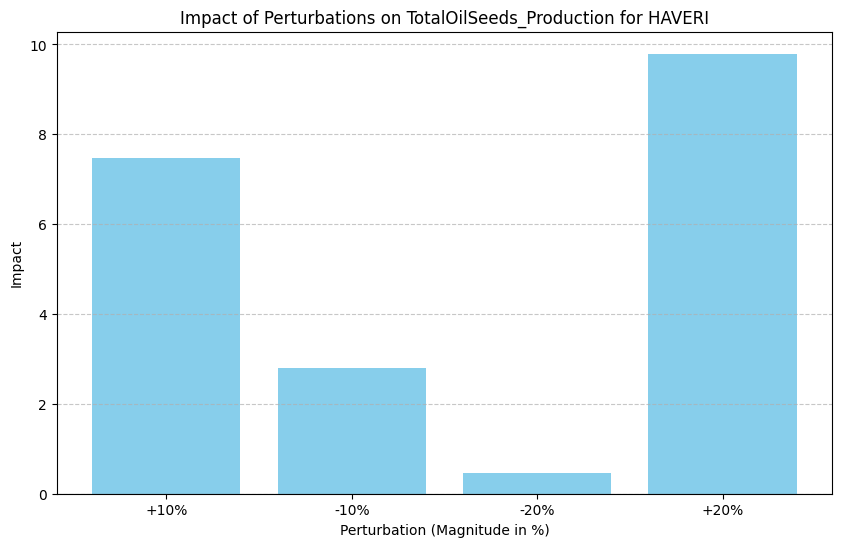

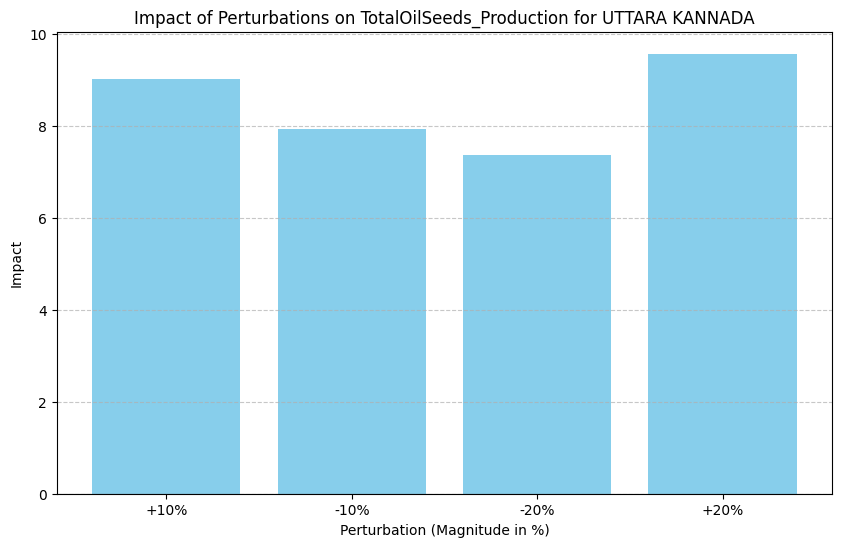

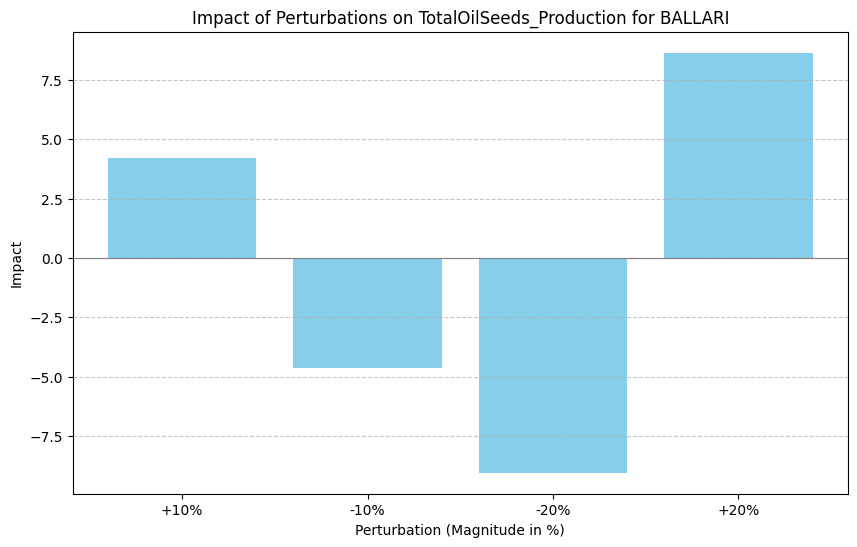

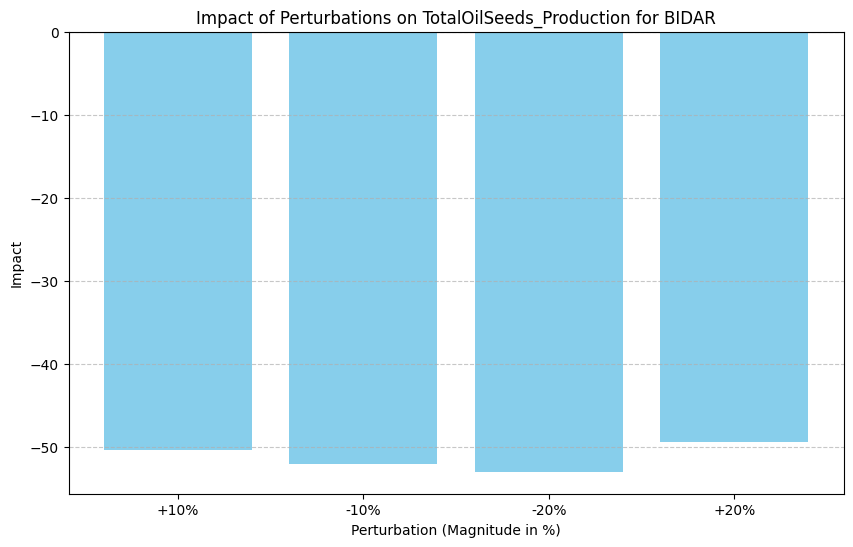

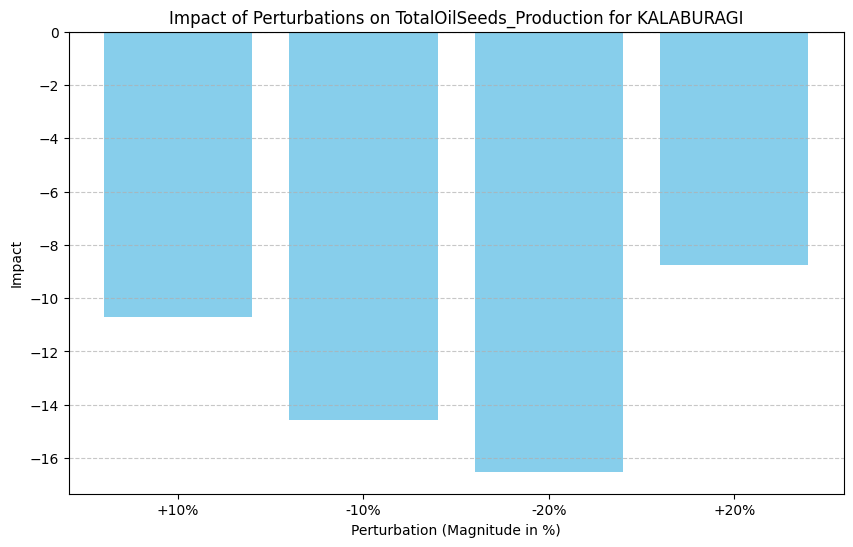

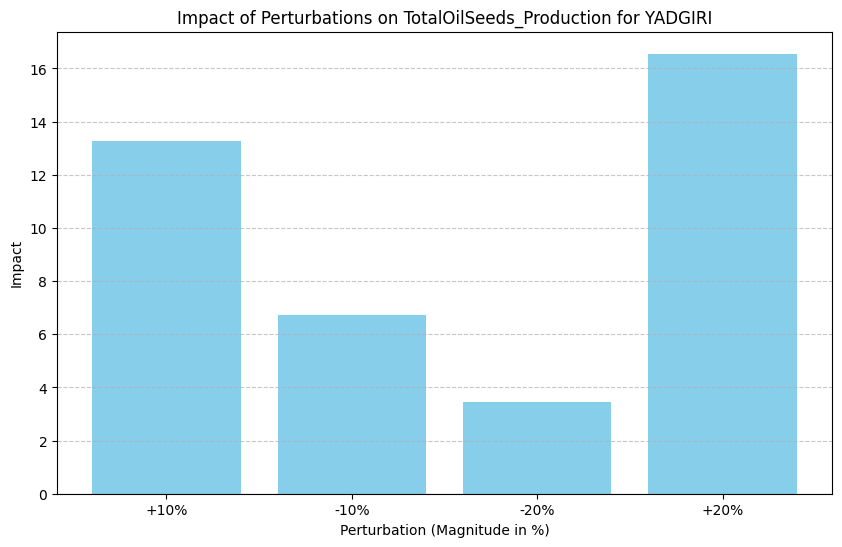

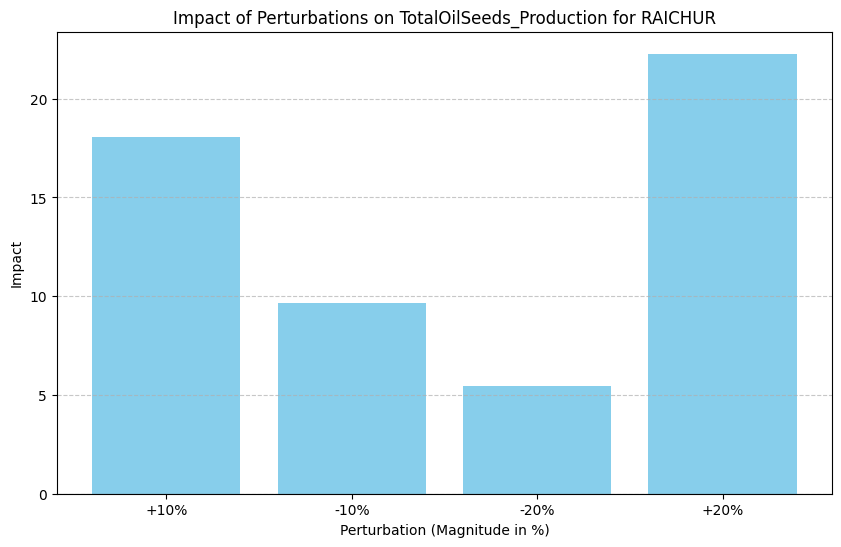

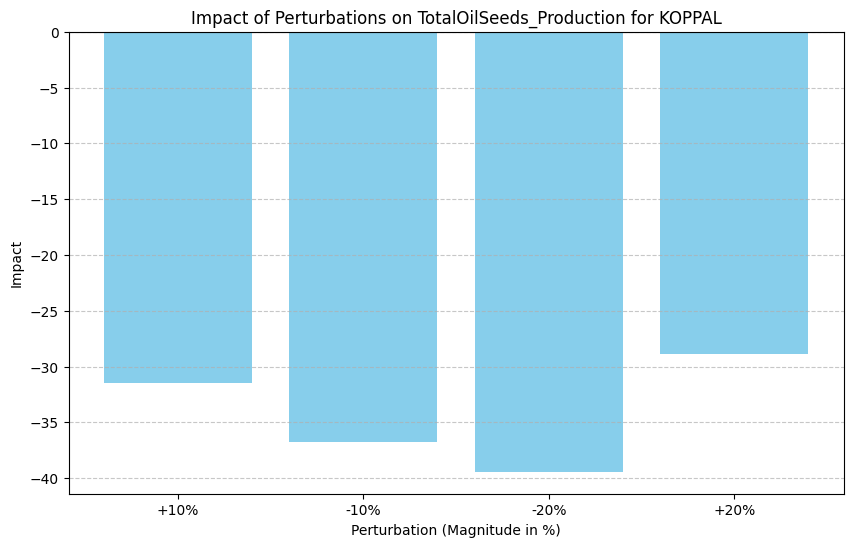

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def bar_graph_analysis(file_path, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    X = data[[variable1]]
    y = data[variable2]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for variable2
    variable2_min = y.min()
    variable2_max = y.max()

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_variable1 = data.loc[data['District'] == district, variable1].iloc[0]
        variable2_old = data.loc[data['District'] == district, variable2].iloc[0]
        normalized_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

        impacts = []

        for p in perturbations_corrected:
            perturbed_variable1 = district_variable1 * (1 + p)
            variable2_new = m * perturbed_variable1 + c
            normalized_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
            impact = (normalized_new - normalized_old) * 100  # Impact calculation
            impacts.append(impact)

        # Plotting the impacts of each perturbation
        plt.figure(figsize=(10, 6))
        plt.bar([f'{p*100:+.0f}%' for p in perturbations_corrected], impacts, color='skyblue')
        plt.xlabel('Perturbation (Magnitude in %)')
        plt.ylabel('Impact')
        plt.title(f'Impact of Perturbations on {variable2} for {district}')
        plt.axhline(0, color='gray', linewidth=0.8)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
variable1 = 'TotalNPK'
variable2 = 'TotalOilSeeds_Production'
user_perturbations = [10, -10, -20, 20]
bar_graph_analysis(file_path, variable1, variable2, user_perturbations)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def choose_perturbation(file_path, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    X = data[[variable1]]
    y = data[variable2]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for variable2
    variable2_min = y.min()
    variable2_max = y.max()

    # Initialize an empty list to store results for each district
    district_results = []

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_variable1 = data.loc[data['District'] == district, variable1].iloc[0]
        variable2_old = data.loc[data['District'] == district, variable2].iloc[0]
        normalized_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

        positive_impacts = []
        negative_impacts = []

        for p in perturbations_corrected:
            perturbed_variable1 = district_variable1 * (1 + p)
            variable2_new = m * perturbed_variable1 + c
            normalized_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
            impact = (normalized_new - normalized_old) * 100  # Impact calculation

            if impact > 0:
                positive_impacts.append((impact, p))
            elif impact < 0:
                negative_impacts.append((impact, p))

        # Choose perturbation based on conditions
        if positive_impacts and not negative_impacts:
            chosen_perturbation = max(positive_impacts)[1]
        elif not positive_impacts and negative_impacts:
            chosen_perturbation = min(negative_impacts)[1]
        elif positive_impacts and negative_impacts:
            chosen_perturbation = max(positive_impacts)[1]

        district_results.append({
            'District': district,
            'Perturbation_Choosen': f'P{user_perturbations.index(chosen_perturbation*100)+1}'
        })

    # Convert the results into a DataFrame and display
    results_df = pd.DataFrame(district_results)
    print(results_df)

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
variable1 = 'TotalNPK'
variable2 = 'TotalOilSeeds_Production'
user_perturbations = [10, -10, -20, 20]
choose_perturbation(file_path, variable1, variable2, user_perturbations)


            District Perturbation_Choosen
0          BENGALURU                   P4
1       BENGALURU(R)                   P4
2         RAMANAGARA                   P4
3        CHITRADURGA                   P3
4         DAVANAGERE                   P4
5              KOLAR                   P4
6    CHIKKABALLAPURA                   P4
7         SHIVAMOGGA                   P4
8           TUMAKURU                   P3
9     CHIKKAMAGALURU                   P4
10  DAKSHINA KANNADA                   P4
11             UDUPI                   P4
12            HASSAN                   P4
13            KODAGU                   P4
14            MANDYA                   P4
15            MYSURU                   P4
16    CHAMARAJANAGAR                   P4
17          BELAGAVI                   P3
18        VIJAYAPURA                   P3
19          BAGALKOT                   P3
20          DHARAWAD                   P3
21             GADAG                   P3
22            HAVERI              